In [1]:
cd /Users/YINAN/Documents/Code/Pycharm/Sealion/

/Users/YINAN/Documents/Code/Pycharm/Sealion


In [42]:
from ast import literal_eval
import pandas as pd
import utils
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import numpy as np
%matplotlib inline

# Generate test patches

In [5]:
converters={"adult_males": literal_eval,
            "subadult_males": literal_eval,
            "adult_females": literal_eval,
            "juveniles": literal_eval,
            "pups": literal_eval,
            "total": literal_eval}

In [8]:
second_df = pd.read_csv('./test_coordinates.csv', converters=converters, index_col='index')

In [ ]:
patch_path = '/Users/YINAN/Local/Sea-lions/Patches'
print('extracting patches for test')
second_sl_patches = utils.extract_patches_with_sealions(second_df)
second_bg_patches = utils.extract_patches_without_sealions(second_df, num_patches=80000)
second = second_sl_patches.copy()
second['backgrounds'] = second_bg_patches

for key in second:
    print(key, len(second[key]))

In [11]:
for key in second:
    counter = 0
    path = patch_path + "/test/" + key + '/'
    for patch in second[key]:
        cv2.imwrite(path+key+"@"+str(counter)+'.jpg', cv2.cvtColor(patch, cv2.COLOR_RGB2BGR))
        counter += 1
    print(key, "completes")



adult_males completes
subadult_males completes
adult_females completes
juveniles completes
pups completes
backgrounds completes


# Plot trained model

In [3]:
train_log_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/trainlog.log'
train_log = pd.read_csv(train_log_path)

In [4]:
train_acc = list(train_log['acc'])
valid_acc = list(train_log['val_acc'])

train_loss = list(train_log['loss'])
valid_loss = list(train_log['val_loss'])

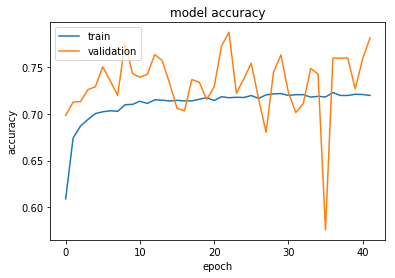

In [5]:
# Summarize history for accuracy
plt.plot(train_acc)
plt.plot(valid_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

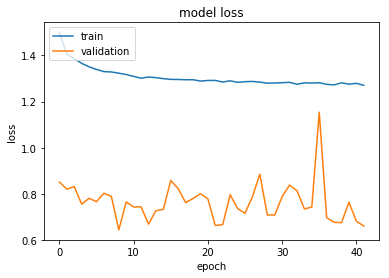

In [6]:
# Summarize history for loss
plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate model using test dataset

In [73]:
model_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/checkpoint.hdf5'
test_data_path = '/Users/YINAN/Local/Sea-lions/Patches/test/'
model = keras.models.load_model(model_path)

In [74]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [75]:
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(96,96),
        batch_size=50,
        shuffle=False) 

Found 97666 images belonging to 6 classes.


In [76]:
model.evaluate_generator(generator=test_generator, workers=1, use_multiprocessing=False)

[0.52935366004560791, 0.83589990321113716]

In [77]:
model.metrics_names

['loss', 'acc']

In [78]:
test_generator.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [79]:
pred_prob = model.predict_generator(test_generator)

In [80]:
len(pred_prob)

97666

In [81]:
pred_classes = np.array([x.argmax() for x in pred_prob])

In [82]:
test_generator.class_indices

{'adult_females': 0,
 'adult_males': 1,
 'backgrounds': 2,
 'juveniles': 3,
 'pups': 4,
 'subadult_males': 5}

In [83]:
num_adult_females = sum(pred_classes == 0)
num_adult_males = sum(pred_classes == 1)
num_backgrounds = sum(pred_classes == 2)
num_juveniles = sum(pred_classes == 3)
num_pups = sum(pred_classes == 4)
num_subadult_males = sum(pred_classes == 5)
print("My predictions are")
print("num_adult_females =", num_adult_females)
print("num_adult_males =", num_adult_males)
print("num_backgrounds", num_backgrounds)
print("num_juveniles", num_juveniles)
print("num_pups", num_pups)
print("num_subadult_males", num_subadult_males)

My predictions are
num_adult_females = 3510
num_adult_males = 3617
num_backgrounds 77425
num_juveniles 7114
num_pups 3047
num_subadult_males 2953


In [87]:
print("real predictions are")
print("num_adult_females =", sum(test_generator.classes == 0))
print("num_adult_males =", sum(test_generator.classes == 1))
print("num_backgrounds", sum(test_generator.classes == 2))
print("num_juveniles", sum(test_generator.classes == 3))
print("num_pups", sum(test_generator.classes == 4))
print("num_subadult_males", sum(test_generator.classes == 5))

real predictions are
num_adult_females = 7880
num_adult_males = 1078
num_backgrounds 80000
num_juveniles 4061
num_pups 3970
num_subadult_males 677


In [110]:
correct_pred = {
    'adult_females': 0,
     'adult_males': 0,
     'backgrounds': 0,
     'juveniles': 0,
     'pups': 0,
     'subadult_males': 0}

index_dic = {
    0: 'adult_females',
    1: 'adult_males',
    2: 'backgrounds',
    3: 'juveniles',
    4: 'pups',
    5: 'subadult_males'
}
for i in range(len(pred_classes)):
    if pred_classes[i] == test_generator.classes[i]:
        correct_pred[index_dic[pred_classes[i]]] += 1

In [111]:
correct_pred

{'adult_females': 2008,
 'adult_males': 647,
 'backgrounds': 75403,
 'juveniles': 2008,
 'pups': 1406,
 'subadult_males': 167}

In [86]:
print("precision is %.3f" % (1-num_wrong_pred/len(test_generator.classes)))

precision is 0.836


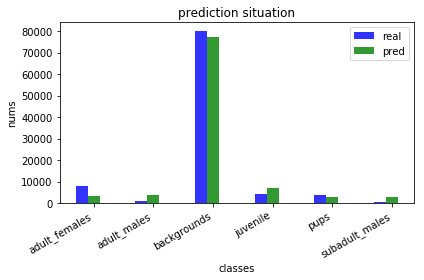

In [98]:
n_groups = 6
real_classes_num = [sum(test_generator.classes == 0), 
                    sum(test_generator.classes == 1),
                    sum(test_generator.classes == 2),
                    sum(test_generator.classes == 3),
                    sum(test_generator.classes == 4),
                    sum(test_generator.classes == 5)]

pred_classes_num = [sum(pred_classes == 0),
                    sum(pred_classes == 1),
                    sum(pred_classes == 2),
                    sum(pred_classes == 3),
                    sum(pred_classes == 4),
                    sum(pred_classes == 5)]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, real_classes_num, bar_width,
                 alpha=opacity,
                 color='b',
                 label='real')
 
rects2 = plt.bar(index + bar_width, pred_classes_num, bar_width,
                 alpha=opacity,
                 color='g',
                 label='pred')
 
plt.xlabel('classes')
plt.ylabel('nums')
plt.title('prediction situation')
plt.xticks(index + bar_width, ('adult_females', 'adult_males', 'backgrounds', 'juvenile', 'pups', 'subadult_males'))
plt.legend()

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

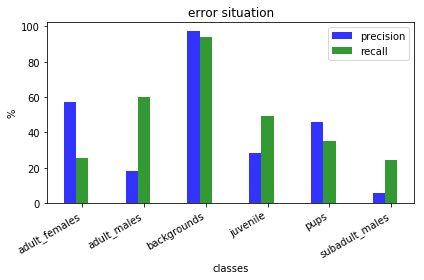

In [115]:
n_groups = 6
precision = []
recall = []
for key, val in correct_pred.items():
    precision.append(val / pred_classes_num[test_generator.class_indices[key]] * 100)
    recall.append(val / real_classes_num[test_generator.class_indices[key]] * 100)
    

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rect = plt.bar(index, precision, bar_width,
                 alpha=opacity,
                 color='b',
                 label='precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
                 alpha=opacity,
                 color='g',
                 label='recall')

plt.xlabel('classes')
plt.ylabel('%')
plt.title('error situation')
plt.xticks(index + bar_width, ('adult_females', 'adult_males', 'backgrounds', 'juvenile', 'pups', 'subadult_males'))
plt.legend()

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()